In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [31]:
housing = pd.read_csv("/Users/chensihan/Desktop/biostat/625/housing_cleaned.csv", keep_default_na=False)#, na_values='null')
print(housing.shape)
housing.head(5)

(187531, 33)


/var/folders/bh/gwg3zhb94zx2t8hzz4s58mlm0000gn/T/ipykernel_62480/1250112227.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv("/Users/chensihan/Desktop/biostat/625/housing_cleaned.csv", keep_default_na=False)#, na_values='null')


,Status,Transaction,Transaction_Other,Transaction_Resale,Transaction_New Property,Transaction_Rent/Lease,Current Floor,Total Floors,Current Floor.c,Total Floors.c,...,Furnishing_Furnished,Index,Bathroom_Category,Balcony_Category,Car_Parking_Category,Ownership_Category,Unnamed: 0,Price (in rupees),location,Carpet Area
0,1,Resale,0.0,1.0,0.0,0.0,10.0,11.0,1.1897773234273794,0.2924224755521858,...,0.0,0,=1,=2,unknown,Other,0,6000.0,thane,500.0
1,1,Resale,0.0,1.0,0.0,0.0,3.0,22.0,-0.3118261550668031,1.7374986608297531,...,0.0,1,=2,,open,Freehold,1,13799.0,thane,473.0
2,1,Resale,0.0,1.0,0.0,0.0,10.0,29.0,1.1897773234273794,2.6570925969154784,...,0.0,2,=2,,covered,Freehold,2,17500.0,thane,779.0
3,1,Resale,0.0,1.0,0.0,0.0,1.0,3.0,-0.7408557203508553,-0.7585420228314997,...,0.0,3,=1,=1,unknown,Other,3,,thane,530.0
4,1,Resale,0.0,1.0,0.0,0.0,20.0,42.0,3.33492514984764,4.3649099067889665,...,0.0,4,=2,,covered,Co-operative Society,4,18824.0,thane,635.0


# original Price (in rupees)

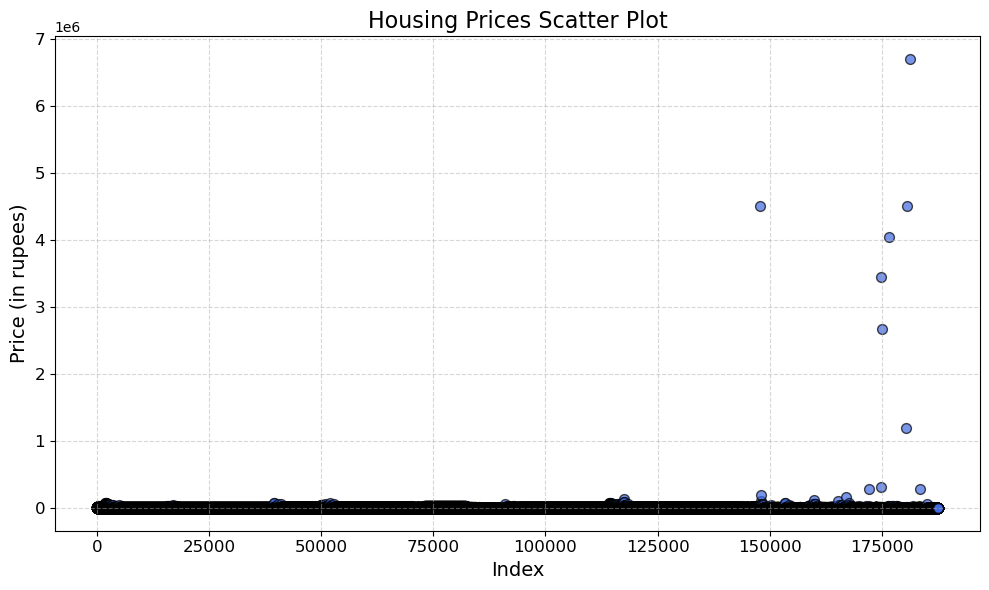

In [32]:
#plot Price (in rupees)
housing["Price (in rupees)"] = pd.to_numeric(housing["Price (in rupees)"], errors='coerce')

# Create the scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(housing.index, housing["Price (in rupees)"], color='royalblue', edgecolor='black', alpha=0.7, s=50)

# Add labels and title
plt.title("Housing Prices Scatter Plot", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price (in rupees)", fontsize=14)

# Customize grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Using zscore to identify outliers

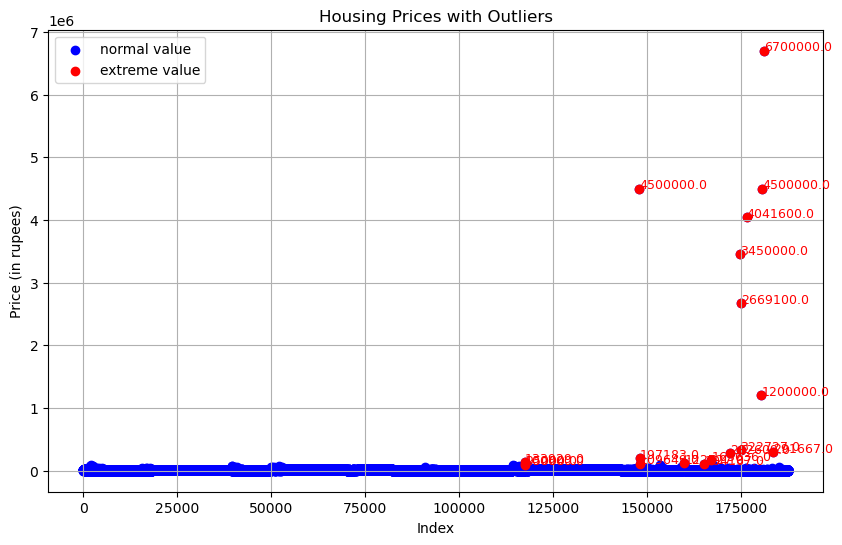

In [33]:
#outliers (using zscore to determine)

mean_price = housing["Price (in rupees)"].mean()
std_price = housing["Price (in rupees)"].std()
housing['Z-score'] = (housing["Price (in rupees)"] - mean_price) / std_price
housing['Outlier'] = np.abs(housing['Z-score']) > 3
outliers = housing[housing['Outlier']]

plt.figure(figsize=(10, 6))
plt.scatter(housing.index, housing["Price (in rupees)"], color='blue', marker='o', label='normal value')
plt.scatter(outliers.index, outliers["Price (in rupees)"], color='red', marker='o', label='extreme value')

for i, row in outliers.iterrows():
    plt.text(i, row["Price (in rupees)"], f'{row["Price (in rupees)"]}', fontsize=9, color='red')

plt.title('Housing Prices with Outliers')
plt.xlabel('Index')
plt.ylabel('Price (in rupees)')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
#print outliers
print(len(outliers))
print(outliers["Index"])

18
117433    117433
117479    117479
117607    117607
147912    147912
148033    148033
148087    148087
159992    159992
165294    165294
167111    167111
172107    172107
174894    174894
174925    174925
175013    175013
176536    176536
180481    180481
180679    180679
181234    181234
183490    183490
Name: Index, dtype: int64


In [35]:
housing_cleaned_price = housing[~housing['Outlier']].drop(columns=['Z-score', 'Outlier'])
housing_cleaned_price.shape

(187513, 33)

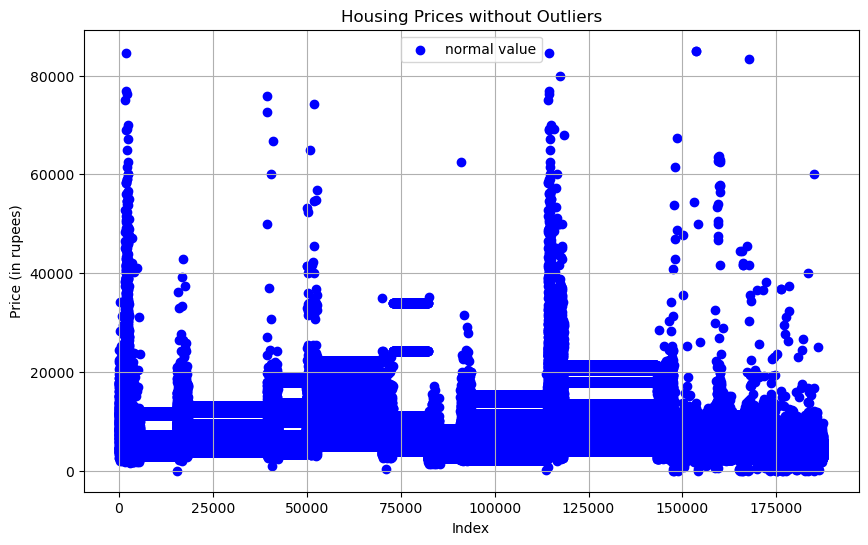

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_cleaned_price.index, housing_cleaned_price["Price (in rupees)"], color='blue', marker='o', label='normal value')

plt.title('Housing Prices without Outliers')
plt.xlabel('Index')
plt.ylabel('Price (in rupees)')
plt.grid(True)
plt.legend()
plt.show()

# Carpet Area

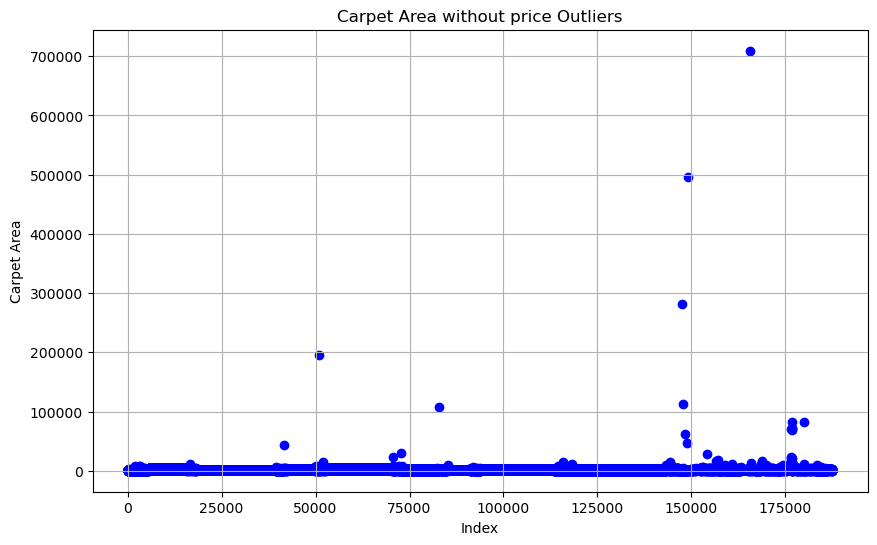

In [37]:
housing_cleaned_price["Carpet Area"] = pd.to_numeric(housing_cleaned_price["Carpet Area"], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(housing_cleaned_price.index, housing_cleaned_price["Carpet Area"], color='blue', marker='o', label='normal value')

plt.title('Carpet Area without price Outliers')
plt.xlabel('Index')
plt.ylabel('Carpet Area')
plt.grid(True)
plt.show()

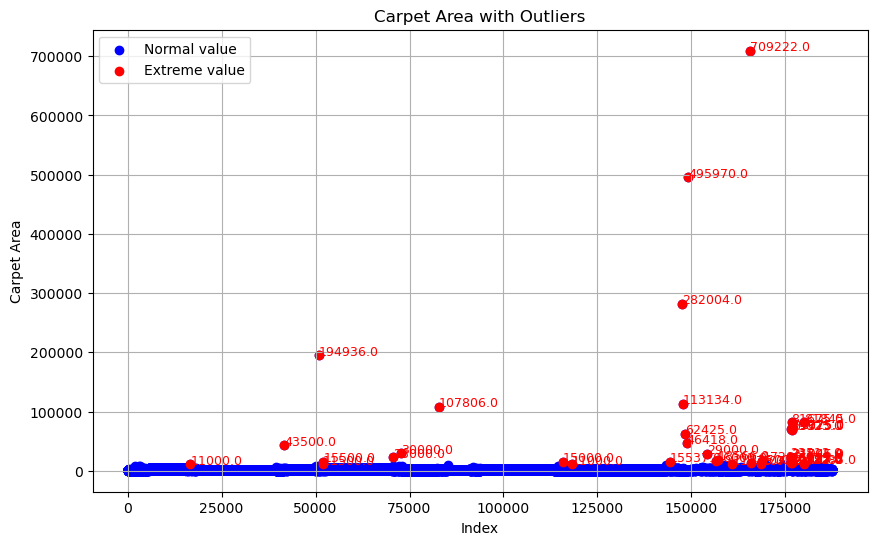

In [39]:
# Calculate z-scores and identify outliers
carpet_area_mean = housing_cleaned_price["Carpet Area"].mean()
carpet_area_std = housing_cleaned_price["Carpet Area"].std()
housing_cleaned_price['Z-score1'] = (housing_cleaned_price["Carpet Area"] - carpet_area_mean) / carpet_area_std
housing_cleaned_price['Outlier1'] = np.abs(housing_cleaned_price['Z-score1']) > 3

# Extract outliers
outliers1 = housing_cleaned_price[housing_cleaned_price['Outlier1']]

# Plotting
plt.figure(figsize=(10, 6))
# Plot normal values
plt.scatter(housing_cleaned_price.index, housing_cleaned_price["Carpet Area"], color='blue', marker='o', label='Normal value')
# Plot outliers
plt.scatter(outliers1.index, outliers1["Carpet Area"], color='red', marker='o', label='Extreme value')

# Label outliers with their Carpet Area values
for i, row in outliers1.iterrows():
    plt.text(i, row["Carpet Area"], f'{row["Carpet Area"]}', fontsize=9, color='red')

# Customize plot appearance
plt.title('Carpet Area with Outliers')
plt.xlabel('Index')
plt.ylabel('Carpet Area')
plt.grid(True)
plt.legend()
plt.show()

In [40]:
#print outliers
print(len(outliers1))
print(outliers1["Index"])

41
16699      16699
41560      41560
50895      50895
51910      51910
52067      52067
70509      70509
72727      72727
82876      82876
115852    115852
118151    118151
144368    144368
147580    147580
147791    147791
148361    148361
148743    148743
149239    149239
154256    154256
156552    156552
157092    157092
160899    160899
165733    165733
165875    165875
168605    168605
168896    168896
176420    176420
176427    176427
176445    176445
176471    176471
176490    176490
176497    176497
176574    176574
176630    176630
176689    176689
176690    176690
176711    176711
176717    176717
176746    176746
176777    176777
176787    176787
180072    180072
180073    180073
Name: Index, dtype: int64


In [53]:
housing_cleaned_price_carpet = housing_cleaned_price[~housing_cleaned_price['Outlier1']].drop(columns=['Z-score1', 'Outlier1'])
housing_cleaned_price_carpet.shape

(187472, 33)

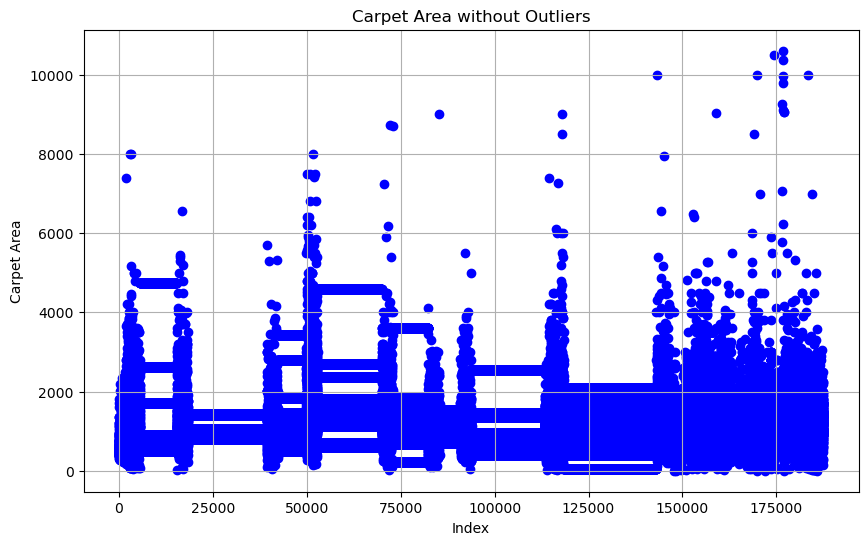

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_cleaned_price_carpet.index, housing_cleaned_price_carpet["Carpet Area"], color='blue', marker='o', label='normal value')

plt.title('Carpet Area without Outliers')
plt.xlabel('Index')
plt.ylabel('Carpet Area')
plt.grid(True)
plt.show

In [54]:

# Standardize "Carpet Area" and create a new variable in the dataset
housing_cleaned_price_carpet["Carpet_Area_Standardized"] = (housing_cleaned_price_carpet["Carpet Area"] - carpet_area_mean) / carpet_area_std
#housing_cleaned_price_carpet = housing_cleaned_price_carpet[:-1]
housing_cleaned_price_carpet.head(5)


,Status,Transaction,Transaction_Other,Transaction_Resale,Transaction_New Property,Transaction_Rent/Lease,Current Floor,Total Floors,Current Floor.c,Total Floors.c,...,Index,Bathroom_Category,Balcony_Category,Car_Parking_Category,Ownership_Category,Unnamed: 0,Price (in rupees),location,Carpet Area,Carpet_Area_Standardized
0,1,Resale,0.0,1.0,0.0,0.0,10.0,11.0,1.1897773234273794,0.2924224755521858,...,0,=1,=2,unknown,Other,0,6000.0,thane,500.0,-0.245587
1,1,Resale,0.0,1.0,0.0,0.0,3.0,22.0,-0.3118261550668031,1.7374986608297531,...,1,=2,,open,Freehold,1,13799.0,thane,473.0,-0.254215
2,1,Resale,0.0,1.0,0.0,0.0,10.0,29.0,1.1897773234273794,2.6570925969154784,...,2,=2,,covered,Freehold,2,17500.0,thane,779.0,-0.156434
3,1,Resale,0.0,1.0,0.0,0.0,1.0,3.0,-0.7408557203508553,-0.7585420228314997,...,3,=1,=1,unknown,Other,3,NaN,thane,530.0,-0.236001
4,1,Resale,0.0,1.0,0.0,0.0,20.0,42.0,3.33492514984764,4.3649099067889665,...,4,=2,,covered,Co-operative Society,4,18824.0,thane,635.0,-0.202449


In [55]:
data_to_save= housing_cleaned_price_carpet
data_to_save.to_csv("/Users/chensihan/Desktop/housing_cleaned_final.csv",index=True)